# Re-implemenation of the fast.ai lesson on Matrix Multiplication 

In [517]:
# first we will load all the allowed libraries and start from scratch 
# please to notice that we wont load the numpy library 

In [518]:
from pathlib import Path 
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch 
import matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
import os

## Checking plot options with Jupyter 

In [519]:
# The default figure size (in inches) is controlled by
# matplotlib.rcParams['figure.figsize'] = [width, height]

In [520]:
plt.rcParams['figure.figsize'] = [5*(math.sqrt(5)+1)/2,5]

In [521]:
def func(x):
    if x == 0:
        return 1
    else:
        return math.sin(x)/x

In [522]:
# since we are not allowed to use numpy array I 
# had to re-implement np.arange(-a,b,number_of_points)
# For my own references - I will have to go back and work 
# through codility exercises https://app.codility.com

In [523]:
lim = 10**2 
points = 10**3 + 1 
step = lim/(points - 1)
arr = [None for kk in range(2*(points - 1)+1)]
for kk in range(points):
    arr[kk] = -lim + kk*step
    arr[-1 - kk] = lim - kk*step

In [524]:
# side note - this was totally unnecessary since torch has its own arange tensor 
arr_torch = torch.arange(-lim, lim + step, step); arr_torch

tensor([-100.0000,  -99.9000,  -99.8000,  ...,   99.8000,   99.9000,
         100.0000])

In [525]:
x_arr = arr_torch.numpy()
func_arr = [func(elem) for elem in x_arr]

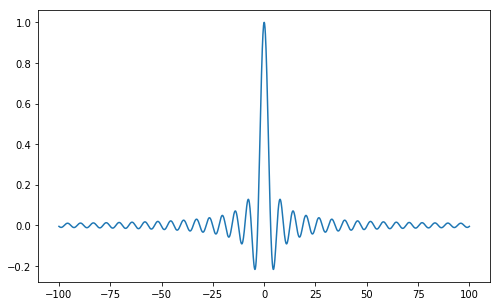

In [526]:
plt.plot(x_arr, func_arr)

# Visualizing MNIST data

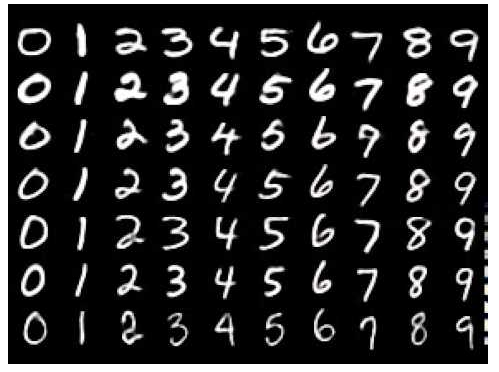

In [527]:
cwd = os.getcwd()
#print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "mnist1.png", width = 500)

In [528]:
# here we go with MNIST data 

In [529]:
MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [530]:
#path = datasets.download_data??

In [535]:
path = datasets.download_data

In [536]:
path = datasets.download_data(
    url = MNIST_URL,
    #fname = "/Users/jameswatson/Documents/ubuntuandmac/machinexp/fast_ai_test/course-v3/nbs/dl2/trials/data/",
    ext = '.gz')

In [537]:
path

PosixPath('/Users/jameswatson/.fastai/data/mnist.pkl.gz')

In [538]:
# so what happens is that we have downloaded MNIST data in .gz format into 
# the folder /Users/jameswatson/.fastai/data [question: what about fname folder???]
# and we shall extract it with gzip or equivalenlty gunzip 
# gunzip mnist.pkl.gz = mnist.pkl
# pickle.load(mnist.pkl) = mnist 

In [539]:
with gzip.open(path, "rb") as f:
    ((x_tr, y_tr), (x_val, y_val), _) = pickle.load(f, encoding='latin-1')

In [540]:
# now we will convert all this data into torch.tensor format to boost the performance 

In [541]:
(x_tr, y_tr, x_val, y_val) = map(torch.tensor, (x_tr, y_tr, x_val, y_val))

In [542]:
print((x_tr, y_tr))

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([5, 0, 4,  ..., 8, 4, 8]))


In [543]:
# we are dealing with lots of images in here 

In [544]:
x_tr.shape 

torch.Size([50000, 784])

In [545]:
y_tr.shape 

torch.Size([50000])

In [ ]:
# num_imgs = mnumber of MNIST hand-written images to be shown later

In [546]:
num_imgs = 15

In [547]:
y_tr[:num_imgs]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1])

In [548]:
image_arr = []
for kk in range(num_imgs):
    image_arr.append(x_tr[kk].numpy())

In [549]:
size = int(math.sqrt(x_tr.shape[1]))
size

28

In [550]:
image_arr_resh = [image_arr[kk].reshape(size,size) for kk in range(num_imgs)]

In [551]:
plt.title(str(y_tr[0].item()))
plt.imshow(image_arr_resh[0])

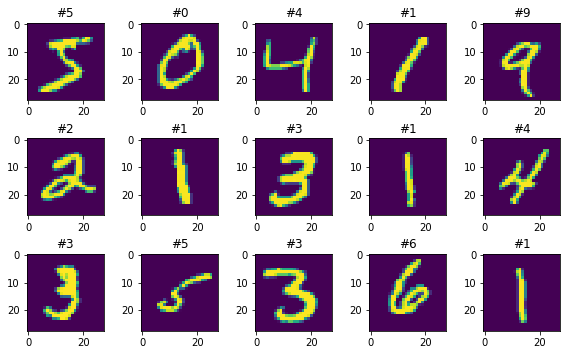

In [552]:
fig=plt.figure() 
lim = num_imgs 
for kk in range(1, lim + 1): 
    ax = fig.add_subplot(num_imgs//5,5,kk)
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    ax.set_title("#" + str(y_tr[kk-1].item()))
    ax.imshow(image_arr_resh[kk-1])
#fig.suptitle('Main title') # or plt.suptitle('Main title') 
plt.show()

# Straightforward implementation of matrix multiplicaiton 

In [553]:
cwd = os.getcwd()
#print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "matrix1.png", width=500)

In [554]:
# we have C[i,j] = \sum^{columns}_{k=1}A[i,k]*B[k,j]
# provided that columns[A] = rows[B]


In [555]:
#import random as rand
#rand.seed(42)
# seed : the important feature for the reproducabiloity of the different code variations!
torch.manual_seed(42)

In [556]:
# first we will need to create random weights

In [557]:
cwd = os.getcwd()
#print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "weights1.jpeg", width=500)

In [583]:
torch.manual_seed(37)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [678]:
weights[:5]

tensor([[-0.0938, -0.4960,  0.9621,  0.3940, -0.9300,  1.1855,  1.4126,  0.1633,
         -1.7673, -1.3445],
        [ 1.5449,  0.4556,  0.1174, -0.7240, -2.1713,  0.7871, -0.6289, -0.0441,
         -1.2323, -0.5070],
        [-1.3766, -2.0966, -1.0178,  0.3734, -0.1329,  0.0586, -1.6333,  0.6670,
         -1.8709,  0.1686],
        [ 0.9332,  0.2010,  0.9667,  0.2277, -1.7471,  2.5883,  1.0854,  0.0448,
         -1.4370,  1.3024],
        [ 0.8505,  1.0503, -0.1305, -0.5963, -0.2838, -0.7701,  1.5392,  0.0304,
          0.5329,  0.5738]])

In [563]:
A = torch.arange(10).reshape(2,5)

In [564]:
B = A.transpose(1, 0)

In [565]:
print("The matrix A is {} \n with dimensions {}".format(A, A.shape))
print(" ")
print("The matrix B is {} \n with dimensions {}".format(B, B.shape))

The matrix A is tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]) 
 with dimensions torch.Size([2, 5])
 
The matrix B is tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]]) 
 with dimensions torch.Size([5, 2])


In [566]:
A.shape

torch.Size([2, 5])

In [585]:
import time 

def matmul(A,B):
    
    #tick = time.time()
    
    ar, ac = A.shape[0], A.shape[1]
    br, bc = B.shape[0], B.shape[1]
    C = torch.zeros(ar, bc)
    for kk in range(ar):
        for ll in range(bc):
            for mm in range(br):
                C[kk, ll] += A[kk,mm] * B [mm, ll]
                
    #tock = time.time()
    
    #delta = tock - tick 
    
    # return [C, delta]
                
    return C

In [568]:
weights.shape

torch.Size([784, 10])

In [569]:
x_val[:5].shape

torch.Size([5, 784])

In [586]:
M1 = x_val[:5]
M2 = weights

In [587]:
%time t1 = matmul(M1,M2)

CPU times: user 2.3 s, sys: 17.8 ms, total: 2.32 s
Wall time: 2.38 s


# Frobenius norm 

In [588]:
# Here we have L_{p,q} norm 

\begin{equation}
    \| A \|_{p,q} =  \left(\sum_{j=1}^n \left( \sum_{i=1}^m |a_{ij}|^p \right)^{\frac{q}{p}}\right)^{\frac{1}{q}}
\end{equation}

In [589]:
# Note for myself - implement the L_{p,q} norm 

In [590]:
# Frobenius norm is nothing but 

\begin{equation}
    \| A \|_{F} =  \| A \|_{2,1}
\end{equation}

In [591]:
# Frobeinius norm can be simplified into 

\begin{equation}
\|A\|_{\rm F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2} = \sqrt{\operatorname{trace}\left(A^* A\right)} = \sqrt{\sum_{i=1}^{\min\{m, n\}} \sigma_i^2(A)}
\end{equation}

In [592]:
A = torch.arange(1.0,9.0 + 1).reshape(3,3); A

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [593]:
At = A.t()

In [594]:
# I guess we are delaing with real-values matrices only 
At

tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])

In [595]:
C =  matmul(At, A);
%time t2 = C; C.trace().sqrt()

CPU times: user 130 µs, sys: 84 µs, total: 214 µs
Wall time: 176 µs


# Element-wise multiplication

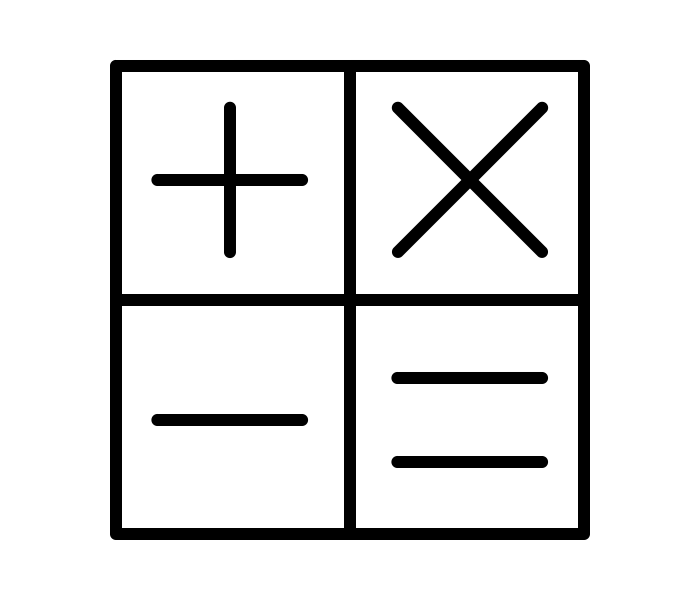

In [596]:
cwd = os.getcwd()
#print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "multiply1.png", width=500)

In [597]:
import time 

def matmul_element(A,B, p = False):
    
    #tick = time.time()
    
    ar, ac = A.shape[0], A.shape[1]
    br, bc = B.shape[0], B.shape[1]
    C = torch.zeros(ar, bc)
    for kk in range(ar):
        for ll in range(bc):
            C[kk, ll] += (A[kk,:] * B [:, ll]).sum()
            if p == True:
                print("The current element {}x{} is {}".format(kk, ll, C[kk,ll]))
                
    #tock = time.time()
    
    #delta = tock - tick 
    
    # return [C, delta]
                
    return C

In [598]:
A = torch.arange(10).reshape(2,5);
B = A.t()

In [599]:
matmul_element(A,B,True)

The current element 0x0 is 30.0
The current element 0x1 is 80.0
The current element 1x0 is 80.0
The current element 1x1 is 255.0


tensor([[ 30.,  80.],
        [ 80., 255.]])

In [600]:
A

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [601]:
B

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [602]:
A[0,:]

tensor([0, 1, 2, 3, 4])

In [603]:
B[:, 0]

tensor([0, 1, 2, 3, 4])

In [604]:
C = matmul_element(A,B)
%time t2 = C

CPU times: user 24 µs, sys: 23 µs, total: 47 µs
Wall time: 58.2 µs


In [605]:
M1 = x_val[:5]
M2 = weights

In [606]:
%time t1 = matmul(M1,M2)

CPU times: user 2.23 s, sys: 14.9 ms, total: 2.24 s
Wall time: 2.26 s


In [607]:
%time t2 = matmul_element(M1,M2)

CPU times: user 6.85 ms, sys: 2.55 ms, total: 9.4 ms
Wall time: 7.37 ms


In [608]:
def matrix_distance(M1, M2, product = matmul(M1,M2)):
    
    D = abs(product - matmul(M1,M2))
    
    epsilon = torch.sum(matmul_element(D.t(),D)).item()
    
    return epsilon
        

In [609]:
matrix_distance(M1, M2, product = matmul_element(M1,M2))

2.247286801093651e-09

# Broadcastin'

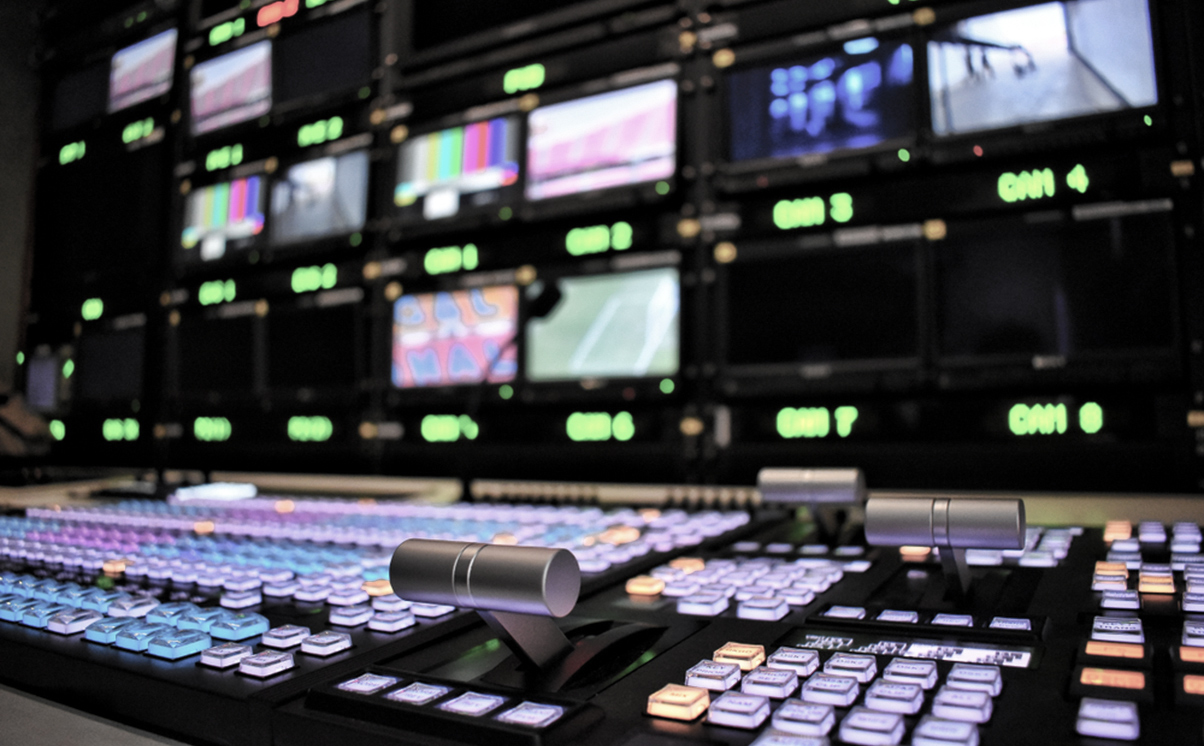

In [610]:
cwd = os.getcwd()
#print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "broadcasting1.jpeg", width=700)

In [611]:
d = 5;
M = torch.arange(1.0, (d*1.0)**2 + 1 , 1.0).reshape(d,d); M

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25.]])

In [612]:
V = torch.arange(10.0, (d + 1)*10.0, 10.0); V

tensor([10., 20., 30., 40., 50.])

In [613]:
M.shape, V.shape

(torch.Size([5, 5]), torch.Size([5]))

In [614]:
M + V

tensor([[11., 22., 33., 44., 55.],
        [16., 27., 38., 49., 60.],
        [21., 32., 43., 54., 65.],
        [26., 37., 48., 59., 70.],
        [31., 42., 53., 64., 75.]])

In [615]:
V.unsqueeze(0).expand_as(M), V.unsqueeze(0).expand_as(M).shape

(tensor([[10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.]]), torch.Size([5, 5]))

In [616]:
V.expand_as(M), V.expand_as(M).shape

(tensor([[10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.],
         [10., 20., 30., 40., 50.]]), torch.Size([5, 5]))

In [617]:
V.unsqueeze(1).expand_as(M), V.unsqueeze(1).expand_as(M).shape

(tensor([[10., 10., 10., 10., 10.],
         [20., 20., 20., 20., 20.],
         [30., 30., 30., 30., 30.],
         [40., 40., 40., 40., 40.],
         [50., 50., 50., 50., 50.]]), torch.Size([5, 5]))

In [618]:
V

tensor([10., 20., 30., 40., 50.])

In [619]:
V.storage()

 10.0
 20.0
 30.0
 40.0
 50.0
[torch.FloatStorage of size 5]

In [620]:
V.stride(), V.shape 

((1,), torch.Size([5]))

In [621]:
S = torch.tensor(1); S

tensor(1)

In [622]:
S.stride(), S.shape

((), torch.Size([]))

In [623]:
T = V + M

In [624]:
T.stride(), T.shape

((5, 1), torch.Size([5, 5]))

In [625]:
T

tensor([[11., 22., 33., 44., 55.],
        [16., 27., 38., 49., 60.],
        [21., 32., 43., 54., 65.],
        [26., 37., 48., 59., 70.],
        [31., 42., 53., 64., 75.]])

In [626]:
V.shape, V.unsqueeze(0).shape, V.unsqueeze(1).shape

(torch.Size([5]), torch.Size([1, 5]), torch.Size([5, 1]))

In [627]:
print("Here we go with boradcasting along 0 axis {} and along 1 axis \n {}".format(V.unsqueeze(0),V.unsqueeze(1)))

Here we go with boradcasting along 0 axis tensor([[10., 20., 30., 40., 50.]]) and along 1 axis 
 tensor([[10.],
        [20.],
        [30.],
        [40.],
        [50.]])


In [628]:
matmul_element(V.unsqueeze(0),V.unsqueeze(1))

tensor([[5500.]])

In [629]:
matmul_element(V.unsqueeze(1),V.unsqueeze(0))

tensor([[ 100.,  200.,  300.,  400.,  500.],
        [ 200.,  400.,  600.,  800., 1000.],
        [ 300.,  600.,  900., 1200., 1500.],
        [ 400.,  800., 1200., 1600., 2000.],
        [ 500., 1000., 1500., 2000., 2500.]])

In [630]:
V.shape, V.unsqueeze(0).shape, V.unsqueeze(1).shape

(torch.Size([5]), torch.Size([1, 5]), torch.Size([5, 1]))

In [631]:
V.shape, V[None, :].shape, V[: , None].shape

(torch.Size([5]), torch.Size([1, 5]), torch.Size([5, 1]))

In [632]:
M 

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25.]])

In [633]:
V

tensor([10., 20., 30., 40., 50.])

In [634]:
M + V[None]

tensor([[11., 22., 33., 44., 55.],
        [16., 27., 38., 49., 60.],
        [21., 32., 43., 54., 65.],
        [26., 37., 48., 59., 70.],
        [31., 42., 53., 64., 75.]])

In [635]:
M + V[:, None]

tensor([[11., 12., 13., 14., 15.],
        [26., 27., 28., 29., 30.],
        [41., 42., 43., 44., 45.],
        [56., 57., 58., 59., 60.],
        [71., 72., 73., 74., 75.]])

# Matrix multiplication with Broadcastin'

In [636]:
# in order to understand the matrix multiplcation with broad-casting we shall watch this gif

In [637]:
cwd = os.getcwd()
#print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "matrix_multiply_1.gif")

In [638]:
A = torch.arange(10).reshape(2,5);
B = A.t()

In [639]:
A

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [640]:
B

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [641]:
A[0, :].unsqueeze(-1)

tensor([[0],
        [1],
        [2],
        [3],
        [4]])

In [642]:
B

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [643]:
(A[0, :].unsqueeze(-1)  * B)

tensor([[ 0,  0],
        [ 1,  6],
        [ 4, 14],
        [ 9, 24],
        [16, 36]])

The current path is  /Users/jameswatson/Documents/ubuntuandmac/machinexp/fast_ai_test/course-v3/nbs/dl2/trials


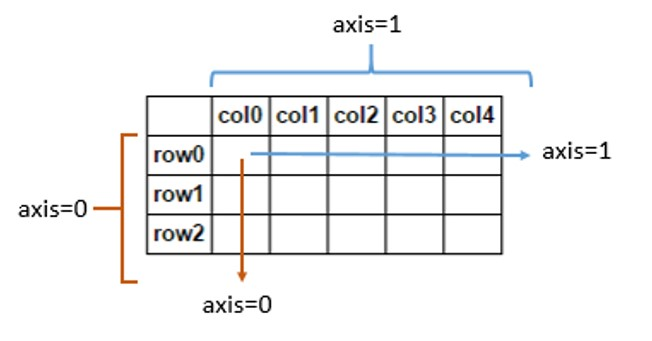

In [644]:
cwd = os.getcwd()
print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "axis1.jpg", width=700)

In [645]:
(A[0, :].unsqueeze(-1)  * B).sum(dim = 0)

tensor([30, 80])

In [646]:
(A[1, :].unsqueeze(-1)  * B).sum(dim = 0)

tensor([ 80, 255])

In [647]:
import time 

def matmul_broad(A,B):
    
    #tick = time.time()
    
    ar, ac = A.shape[0], A.shape[1]
    br, bc = B.shape[0], B.shape[1]
    C = torch.zeros(ar, bc)
    for kk in range(ar):
        
        C[kk] = (A[kk, :].unsqueeze(-1)  * B).sum(dim = 0)
                
    #tock = time.time()
    
    #delta = tock - tick 
    
    # return [C, delta]
                
    return C

In [648]:
matmul_broad(A,B)

tensor([[ 30.,  80.],
        [ 80., 255.]])

In [649]:
M1 = x_val[:5]
M2 = weights

# Timing of MatMul vs MatMul via Element-wise vs MatMul via Broadcastin'

In [650]:
%timeit -n 2 t1=matmul(M1, M2)

2.61 s ± 531 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [651]:
%timeit -n 5 t2=matmul_element(M1, M2)

6.7 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [652]:
%timeit -n 10 t3=matmul_broad(M1, M2)

599 µs ± 158 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [653]:
#MatMul:MatMul via Element-wise:MatMul via Broadcastin = 2.4s:4*10**(-3)*s:500*10**(-6)s

# Albert Einstein summation 

In [654]:
cwd = os.getcwd()
print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "einstein2.jpeg", width=500)

The current path is  /Users/jameswatson/Documents/ubuntuandmac/machinexp/fast_ai_test/course-v3/nbs/dl2/trials


In [655]:
Image(filename = cwd + "/cool_images/" + "einstein1.jpeg", width=500)

In [656]:
# the Einstein summation is pretty strighforwards with pytorch library 

In [657]:
def matmul_einstein(A,B):
    C = torch.einsum('ik,kj->ij', A, B)
    return C

In [658]:
A = torch.arange(10).reshape(2,5);
B = A.t()

In [659]:
A

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [660]:
B

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [661]:
matmul_einstein(A,B)

tensor([[ 30,  80],
        [ 80, 255]])

In [662]:
M1 = x_val[:5]
M2 = weights

In [663]:
%timeit -n 10 t4=matmul_einstein(M1, M2)

157 µs ± 58.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [664]:
matrix_distance(M1,M2, product = matmul_einstein(M1, M2))

2.221820949444009e-09

# Matrix multiplication with pytorch 

In [665]:
cwd = os.getcwd()
print("The current path is ", cwd)
Image(filename = cwd + "/cool_images/" + "pytorch1.jpeg", width=500)

The current path is  /Users/jameswatson/Documents/ubuntuandmac/machinexp/fast_ai_test/course-v3/nbs/dl2/trials


In [668]:
C = A.matmul(B)

In [669]:
C

tensor([[ 30,  80],
        [ 80, 255]])

In [687]:
M1 = x_val[:5]
M2 = weights

In [688]:
M2[:5]

tensor([[-0.0938, -0.4960,  0.9621,  0.3940, -0.9300,  1.1855,  1.4126,  0.1633,
         -1.7673, -1.3445],
        [ 1.5449,  0.4556,  0.1174, -0.7240, -2.1713,  0.7871, -0.6289, -0.0441,
         -1.2323, -0.5070],
        [-1.3766, -2.0966, -1.0178,  0.3734, -0.1329,  0.0586, -1.6333,  0.6670,
         -1.8709,  0.1686],
        [ 0.9332,  0.2010,  0.9667,  0.2277, -1.7471,  2.5883,  1.0854,  0.0448,
         -1.4370,  1.3024],
        [ 0.8505,  1.0503, -0.1305, -0.5963, -0.2838, -0.7701,  1.5392,  0.0304,
          0.5329,  0.5738]])

In [670]:
M = M1.matmul(M2)

In [671]:
M

tensor([[  2.1468,  -3.3709, -21.1261, -13.4969,   1.1520,  -0.9633,  -5.6850,
           7.2117,  11.5178,  -7.3044],
        [  3.2164,  10.0015, -12.5006, -10.2446,   2.6913,  -2.2712,   2.6047,
          14.0206,   6.0539,  -9.2448],
        [ -5.9586,   1.4758, -10.7945,  -7.0397,   1.5595,  14.6577, -14.1755,
          -0.9442,   7.4276, -10.0902],
        [  3.8819,   0.7811,  -4.9634, -23.4550,  -5.0545,  -0.0653, -10.4614,
           5.9267,  -0.5396,  -5.9223],
        [ -0.6941,   6.1125, -21.5290, -23.5980,  -2.8810,  11.8334,  -9.6311,
          -0.4555,   2.3542,   0.7555]])

In [676]:
%timeit -n 10 t5 = M1.matmul(M2)

60.7 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [689]:
matrix_distance(M1, M2, product = M1.matmul(M2))

2.221820949444009e-09